Basic Plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("btc-market-price.csv", header=None) # read in the data, do not infer headers
df.columns = ["Timestamp", "Price"] # add headers
df.head() # preview the data

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [4]:
df # preview the data

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [5]:
df.shape # check the shape of the DataFrame

(365, 2)

In [6]:
df.info() # check the info of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [7]:
df.describe().T # get a statistical summary

,count,mean,std,min,25%,50%,75%,max
Price,365.0,6359.574241,4528.87887,1099.169125,2585.349186,4594.98785,9182.843333,19498.683333


In [8]:
df.dtypes # check the data types

Timestamp     object
Price        float64
dtype: object

In [9]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"]).dt.strftime("%Y-%m-%d") # convert the Timestamp column to datetime nad then  format it as a string in YYYY-MM-DD format using strftime()
df.head() # preview the data

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"]) # convert the Timestamp column to datetime
df.info() # check the info of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  365 non-null    datetime64[ns]
 1   Price      365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [12]:
df.set_index("Timestamp", inplace=True) # set the Timestamp column as the index
df.head() # preview the data

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [13]:
df.loc["2017-09-29"]

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

In [14]:
#all steps in one cell

df = pd.read_csv('btc-market-price.csv', header=None) # read in the data, do not infer headers
df.columns = ['Timestamp', 'Price'] # add headers
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # convert the Timestamp column to datetime
df.set_index('Timestamp', inplace=True) # set the Timestamp column as the index
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [15]:
# better way by specifying more parameters to achieve the same results

df = pd.read_csv('btc-market-price.csv', header=None, names=['Timestamp', 'Price'], index_col=0, parse_dates=True, date_format="%Y-%m-%d") # read in the data, specify headers, set the index, and parse dates, index_col=0 means the first column is the index, parse_dates=True means parse the index (timestamp column) as dates


df

,Price
Timestamp,
2017-04-02 00:00:00,1099.169125
2017-04-03 00:00:00,1141.813000
2017-04-04 00:00:00,1141.600363
2017-04-05 00:00:00,1133.079314
2017-04-06 00:00:00,1196.307937
...,...
2018-03-28 00:00:00,7960.380000
2018-03-29 00:00:00,7172.280000
2018-03-30 00:00:00,6882.531667


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2017-04-02 00:00:00 to 2018-04-01 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


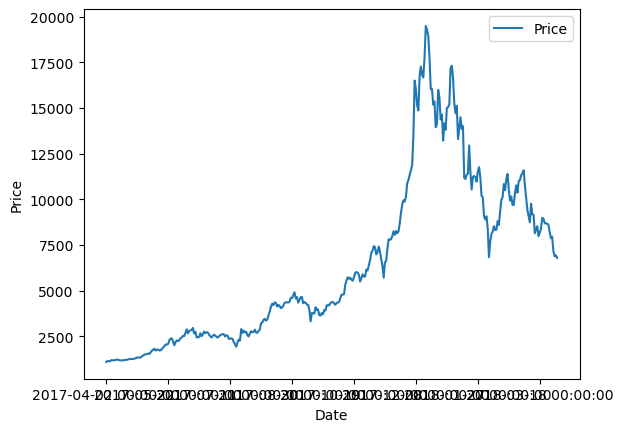

In [17]:
df.plot() # plot the data
plt.xlabel('Date') # add an x-label to the plot
plt.ylabel('Price') # add a y-label to the plot
plt.show() # show the plot

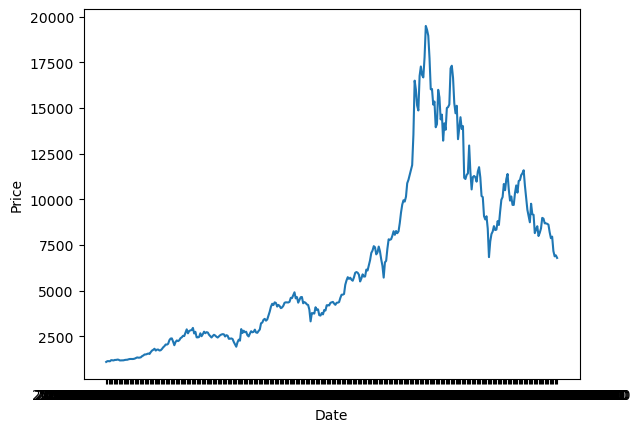

In [18]:
plt.plot(df.index, df['Price']) # plot the data
plt.xlabel('Date') # add an x-label to the plot
plt.ylabel('Price') # add a y-label to the plot
plt.show() # show the plot

In [19]:
x = np.arange(-15,10) # create an array of values from -15 to 10

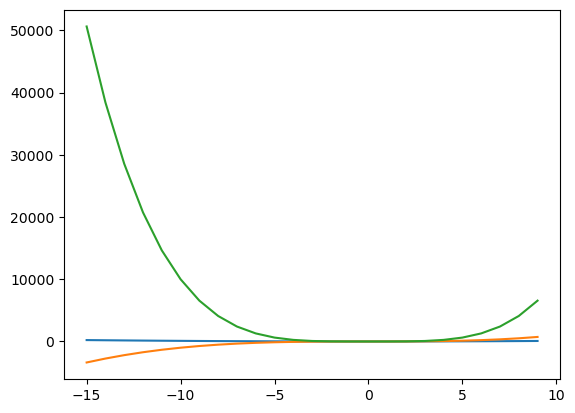

In [20]:
plt.plot(x, x**2) # plot x squared
plt.plot(x, x**3) # plot x cubed
plt.plot(x, x**4) # plot x to the power of 4

plt.show() # show the plot


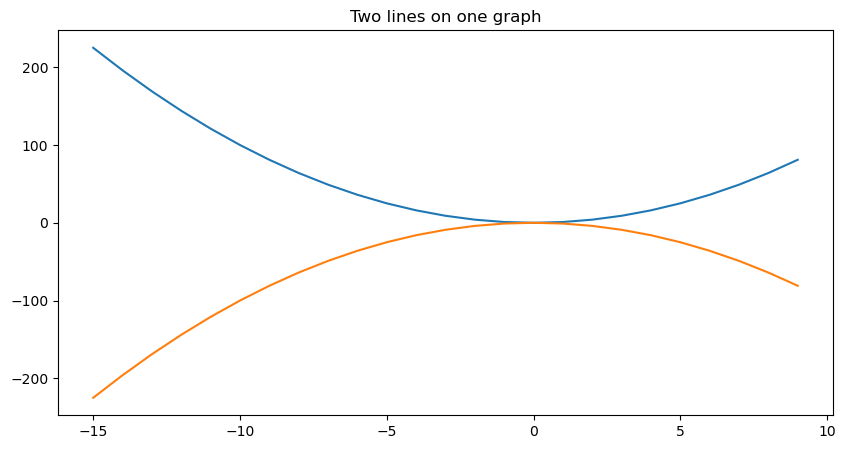

In [21]:
plt.figure(figsize=(10,5))
plt.plot(x, x**2)
plt.plot(x, -1 * (x**2))
plt.title("Two lines on one graph")
plt.show()

In [22]:
# CREATE AN EMPTY DATAFRAME AND ADD BITCOIN AND ETHEREUM PRICES TO IT AND THEN PLOT IT

# add ethernet to the plot
eth = pd.read_csv("eth-price.csv", parse_dates=['Date(UTC)'], index_col='Date(UTC)')
eth

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23
...,...,...
2018-03-28,1522195200,445.93
2018-03-29,1522281600,383.90
2018-03-30,1522368000,393.82


In [23]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB


In [24]:
# create an empty dataframe
prices_df = pd.DataFrame(index=df.index) # create an empty dataframe with the same index as df
prices_df

""
Timestamp
2017-04-02 00:00:00
2017-04-03 00:00:00
2017-04-04 00:00:00
2017-04-05 00:00:00
2017-04-06 00:00:00
...
2018-03-28 00:00:00
2018-03-29 00:00:00
2018-03-30 00:00:00


In [25]:
prices_df["Bitcoin"] = df["Price"] # add the bitcoin prices to the prices_df dataframe
prices_df["Ethereum"] = eth["Value"] # add the ethereum prices to the prices_df dataframe
prices_df

,Bitcoin,Ethereum
Timestamp,,
2017-04-02 00:00:00,1099.169125,48.55
2017-04-03 00:00:00,1141.813000,44.13
2017-04-04 00:00:00,1141.600363,44.43
2017-04-05 00:00:00,1133.079314,44.90
2017-04-06 00:00:00,1196.307937,43.23
...,...,...
2018-03-28 00:00:00,7960.380000,445.93
2018-03-29 00:00:00,7172.280000,383.90
2018-03-30 00:00:00,6882.531667,393.82


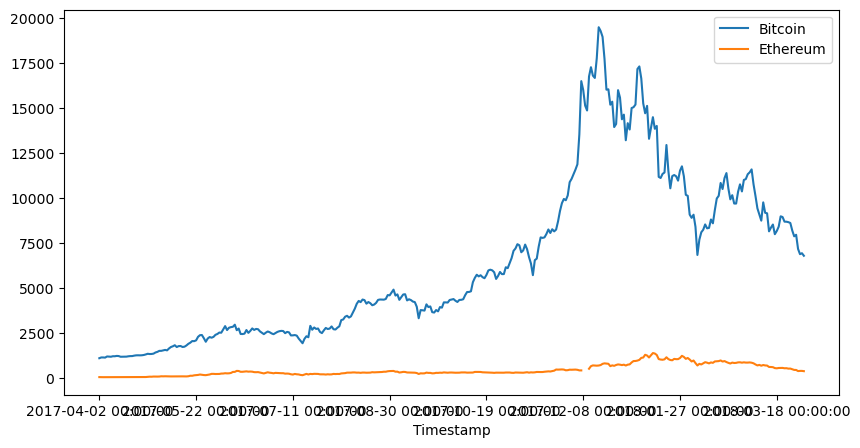

In [26]:
prices_df.plot(figsize=(10,5)) # plot the prices_df dataframe
plt.show() # show the plot